In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =15, 6

In [2]:
from statsmodels.tsa.arima_model import ARIMA

In [3]:
import statsmodels.api as sm

In [4]:
dados = pd.read_excel('vendas_varejo.xlsx')

In [5]:
dados.index = pd.date_range('1/1/2000', periods=189, freq='M', normalize =True)

In [6]:
dados.head()

,Data,Indice
2000-01-31,2000-01-01,53.2
2000-02-29,2000-02-01,53.8
2000-03-31,2000-03-01,56.1
2000-04-30,2000-04-01,56.1
2000-05-31,2000-05-01,58.4


In [7]:
del dados['Data']

In [8]:
serie = dados['Indice']

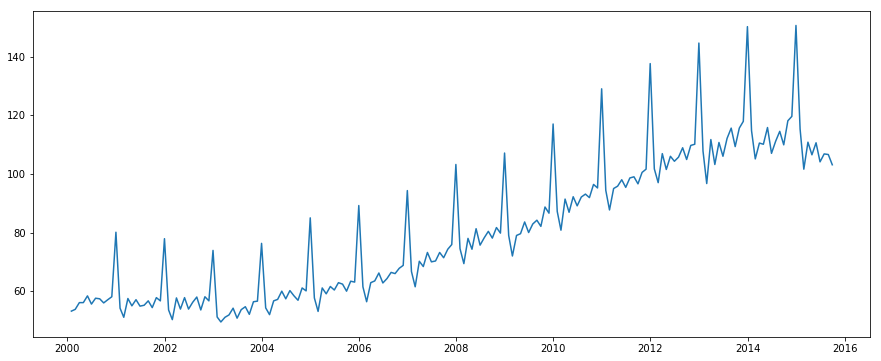

In [9]:
plt.plot(serie)
plt.show()

In [10]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


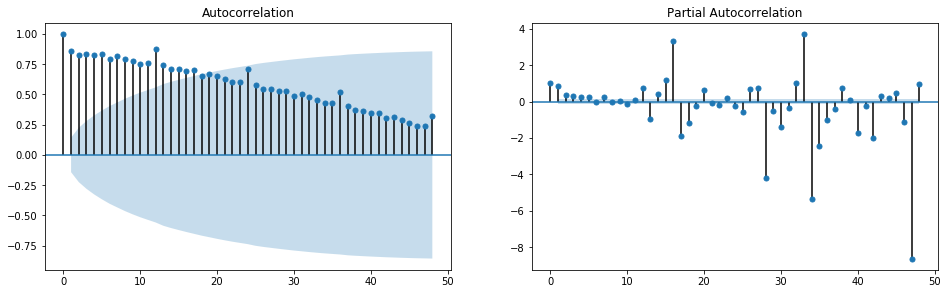

In [11]:
qtd_lag = 48
acf_pacf(serie, qtd_lag)

In [12]:
tam_treinamento = int(len(serie) * 0.75)
dados_treinamento, dados_teste = serie.iloc[0:tam_treinamento].values, serie.iloc[tam_treinamento:].values

In [13]:
p = 3
d = 1
q = 1

In [14]:
modelo_arima = ARIMA(dados_treinamento, order=(p,d,q)).fit(disp=0)

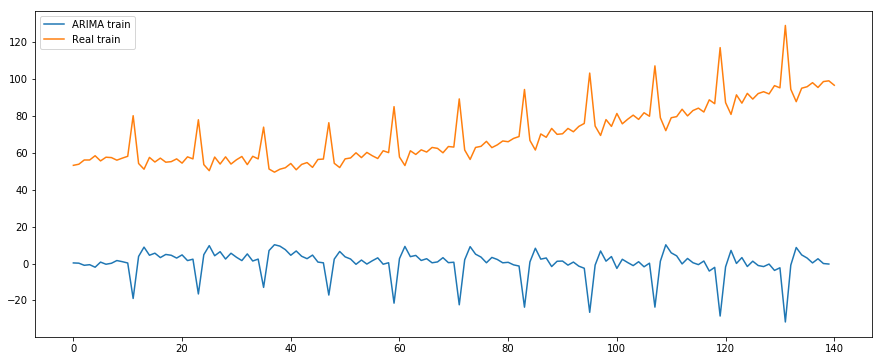

In [15]:
plt.plot(modelo_arima.fittedvalues, label = 'ARIMA train')
plt.plot(dados_treinamento, label='Real train')
plt.legend(loc='best')
plt.show()

In [16]:
historico = [x for x in dados_treinamento]
previsoes = []
for i in range(len(dados_teste)):
    modelo = ARIMA(historico, order=(p,d,q)).fit()
    prev = modelo.forecast()[0]
    previsoes.append(prev)
    obs = dados_teste[i]
    historico.append(obs)

In [17]:
len(dados_teste)

48

In [18]:
len(previsoes)

48

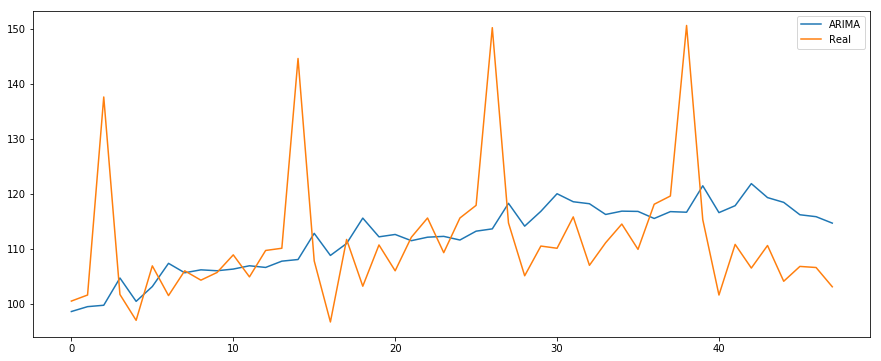

In [19]:
plt.plot(previsoes, label = 'ARIMA')
plt.plot(dados_teste, label='Real')
plt.legend(loc='best')
plt.show()

### Utilizando SARIMA

In [20]:
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
m = 24

In [21]:
model=sm.tsa.statespace.SARIMAX(endog=dados_treinamento,order=(p,d,q),seasonal_order=( P,D,Q,m)).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  141
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -245.723
Date:                            Mon, 27 May 2019   AIC                            501.446
Time:                                    09:16:26   BIC                            515.214
Sample:                                         0   HQIC                           507.035
                                            - 141                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1763      0.146     -1.207      0.227      -0.463       0.110
ma.L1         -0.5086      0.128     -3.966      0.000      -0.760      -0.257
ar.S.L24      -0.2193      0.390     -0.562      0.574      -0.984       0.546
ma.S.L24      -0.0471      0.414     -0.114      0.910      -0.859       0.765
sigma2         3.9729      0.423      9.393      0.000       3.144       4.802
===================================================================================
Ljung-Box (Q):                       56.90   Jarque-Bera (JB):                19.83
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.44
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

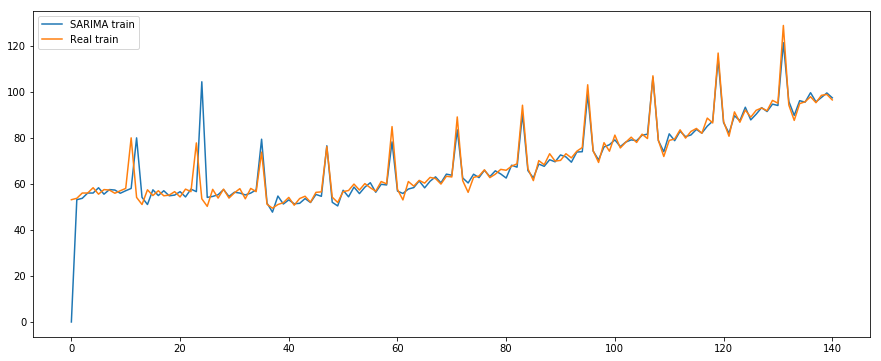

In [23]:
plt.plot(model.fittedvalues, label = 'SARIMA train')
plt.plot(dados_treinamento, label='Real train')
plt.legend(loc='best')
plt.show()

In [24]:
historico = [x for x in dados_treinamento]
previsoes = []
for i in range(len(dados_teste)):
    modelo = sm.tsa.statespace.SARIMAX(historico, order=(p,d,q),seasonal_order=(P,D,Q,m)).fit()
    prev = modelo.forecast()[0]
    previsoes.append(prev)
    obs = dados_teste[i]
    historico.append(obs)

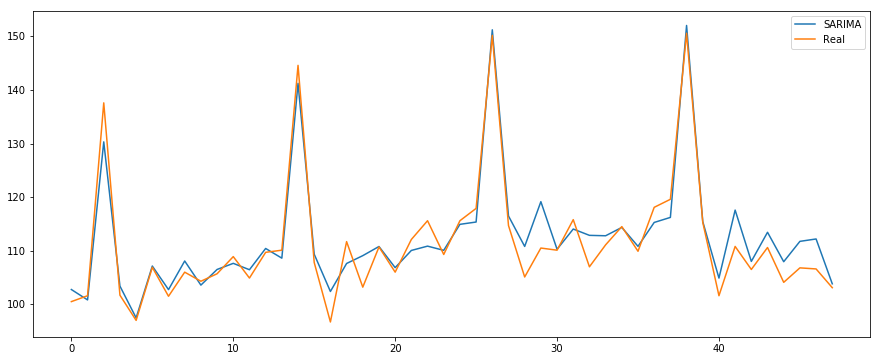

In [25]:
plt.plot(previsoes, label = 'SARIMA')
plt.plot(dados_teste, label='Real')
plt.legend(loc='best')
plt.show()